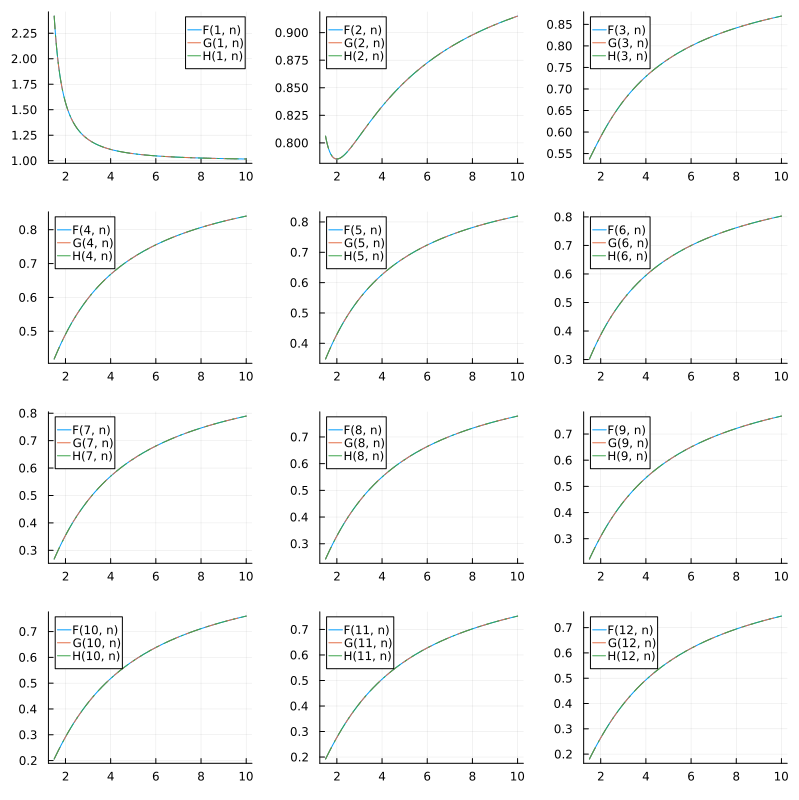

In [1]:
using QuadGK
using Plots
default(fmt=:png)
using SpecialFunctions

F(m, n) = m*n > 1 ? quadgk(x -> 1/(1 + x^n)^m, 0, Inf)[1] : Inf
G(m, n) = 1/n * beta(1/n, m-1/n)
H(m::Integer, n) = m*n > 1 ? 1/n * prod(1 - 1/(k*n) for k in 1:m-1; init = 1) * π/sin(π/n) : Inf

PP = []
for m in 1:12
    P = plot(n -> F(m, n), 1.5, 10; label="F($m, n)")
    plot!(n -> G(m, n); label="G($m, n)", ls=:dash)
    plot!(n -> H(m, n); label="H($m, n)", ls=:dashdot)
    push!(PP, P)
end
plot(PP...; size=(800, 800), layout=(4, 3))